In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
d = 0.05
a = 0.3
b = 0.5
n = 1000000

# Initialize arrays
Y = np.zeros(n)
lambda_t = np.zeros(n)

# Initial values
lambda_t[0] = d / (1 - a - b)
Y[0] = np.random.poisson(lambda_t[0])

# Simulate the process
for t in range(1, n):
    lambda_t[t] = d + a * lambda_t[t-1] + b * Y[t-1]
    Y[t] = np.random.poisson(lambda_t[t])

# Theoretical expectation and variance
mu_theoretical = d / (1 - a - b)
var_lambda_t_theoretical = (b**2 * d) / ((1 - a - b) * (1 - (a+b)**2))
var_Y_t_theoretical = mu_theoretical + var_lambda_t_theoretical

# Simulated expectation and variance
mu_lambda_t_simulated = np.mean(lambda_t)
var_lambda_t_simulated = np.var(lambda_t)
mu_Y_t_simulated = np.mean(Y)
var_Y_t_simulated = np.var(Y)

# Simulated covariance
cov_matrix = np.cov(Y[:-1], Y[1:])
cov_Y_t_simulated = cov_matrix[0, 1]

In [2]:
print(mu_lambda_t_simulated, mu_Y_t_simulated, mu_theoretical)
print(var_lambda_t_simulated, var_lambda_t_theoretical)
print(var_Y_t_simulated, var_Y_t_theoretical)

0.25029311224489803 0.25041 0.25000000000000006
0.17342636226942512 0.17361111111111124
0.4234448319000002 0.42361111111111127


In [3]:
from scipy.optimize import fsolve

# define functions
def equations(vars):
    x, y, z = vars
    eq1 = z/(1-x-y) - mu_Y_t_simulated
    eq2 = z/(1-x-y) * (1 + y**2/(1-(x+y)**2)) - var_Y_t_simulated
    eq3 = x * z/(1-x-y) * (y**2/(1-(x+y)**2)) + y * z/(1-x-y) * (1 + y**2/(1-(x+y)**2)) - cov_Y_t_simulated
    return [eq1, eq2, eq3]

# initial guess
initial_guess = [0.05, 0.63, 0.05]

# use fsolve to solve equation
solution = fsolve(equations, initial_guess)

print("solution: a = {}, b = {}, d = {}".format(solution[0], solution[1], solution[2]))


solution: a = 0.29728250816700924, b = 0.5008375387428097, d = 0.05055275906533671


In [4]:
x,y,z = solution
eq1 = z/(1-x-y) - mu_Y_t_simulated
eq2 = z/(1-x-y) * (1 + y**2/(1-(x+y)**2)) - var_Y_t_simulated
eq3 = x * z/(1-x-y) * (y**2/(1-(x+y)**2)) + y * z/(1-x-y) * (1 + y**2/(1-(x+y)**2)) - cov_Y_t_simulated
print(eq1, eq2, eq3)

5.956235504811502e-11 1.1356776630222498e-10 7.322037420820493e-11


In [5]:
for n in range(10000,10000000,10000):
    Y = np.zeros(n)
    lambda_t = np.zeros(n)

    # Initial values
    lambda_t[0] = d / (1 - a - b)
    Y[0] = np.random.poisson(lambda_t[0])

    # Simulate the process
    for t in range(1, n):
        lambda_t[t] = d + a * lambda_t[t-1] + b * Y[t-1]
        Y[t] = np.random.poisson(lambda_t[t])

    # Theoretical expectation and variance
    mu_theoretical = d / (1 - a - b)
    var_lambda_t_theoretical = (b**2 * d) / ((1 - a - b) * (1 - (a+b)**2))
    var_Y_t_theoretical = mu_theoretical + var_lambda_t_theoretical

    # Simulated expectation and variance
    mu_lambda_t_simulated = np.mean(lambda_t)
    var_lambda_t_simulated = np.var(lambda_t)
    mu_Y_t_simulated = np.mean(Y)
    var_Y_t_simulated = np.var(Y)

    # Simulated covariance
    cov_matrix = np.cov(Y[:-1], Y[1:])
    cov_Y_t_simulated = cov_matrix[0, 1]

    initial_guess = [0.05, 0.63, 0.05]

    # use fsolve to solve equation
    solution = fsolve(equations, initial_guess)
    if (a-solution[0])**2 + (b-solution[1])**2 + (d-solution[2])**2 <= 0.00001:
        break
print(n)
print(solution)

320000
[0.29851047 0.49862395 0.05090151]


## Part 2

In [6]:
# Parameters
d = 0.05
a = 0.25
b_1 = 0.35
b_2 = 0.45
n = 100000
# Initialize arrays
Y = np.zeros(n)
lambda_t = np.zeros(n)

# Initial values
lambda_t[0] = d * (1+a+b_1) / (1 - (a+b_1) * (a+b_2))
Y[0] = np.random.poisson(lambda_t[0])

# Simulate the process
for t in range(1, n):
    if t % 2 == 1:
        lambda_t[t] = d + a * lambda_t[t-1] + b_2 * Y[t-1]
    else:
        lambda_t[t] = d + a * lambda_t[t-1] + b_1 * Y[t-1]
    Y[t] = np.random.poisson(lambda_t[t])


# Simulated expectation and variance
mu_lambda_t_simulated = np.mean(lambda_t)
var_lambda_t_simulated = np.var(lambda_t)
mu_Y_t_simulated = np.mean(Y)
var_Y_t_simulated = np.var(Y)


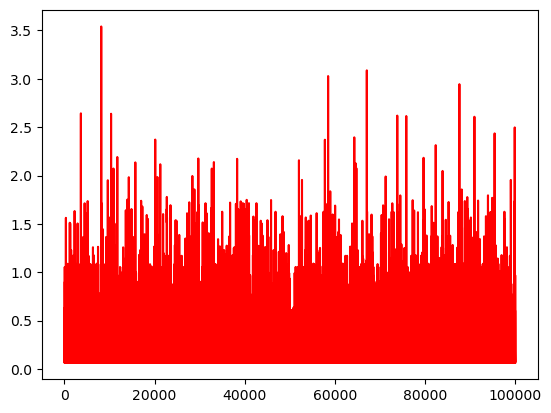

In [7]:

plt.plot(lambda_t,'r')

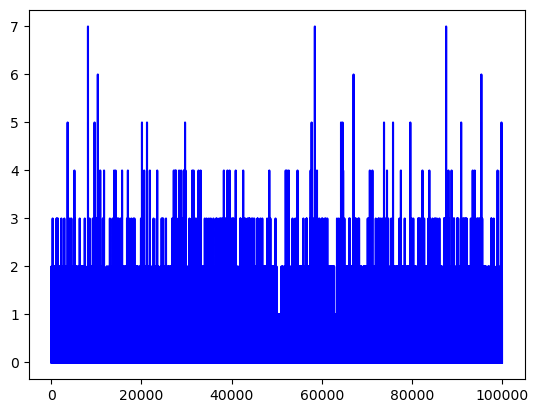

In [8]:
plt.plot(Y,'b')

In [9]:
print(mu_lambda_t_simulated, mu_Y_t_simulated)
print(var_lambda_t_simulated, var_Y_t_simulated)

0.14166694905224791 0.14117
0.03897193950975506 0.18006103109999996


In [10]:
print(np.mean(lambda_t[1::2]), np.mean(Y[1::2]))
print(np.mean(lambda_t[0::2]), np.mean(Y[0::2]))


0.1459147796208992 0.14554
0.13741911848359672 0.1368


## Part 3

In [11]:
# Parameters
d = 0.05
a = 0.25
b = 0.4
per = [0.6, 0.9]
n = 100000
# Initialize arrays
Y = np.zeros(n)
lambda_t = np.zeros(n)

# Initial values
lambda_t[0] = d / (1 - a - b)
Y[0] = np.random.poisson(lambda_t[0])

# Simulate the process
for t in range(1, n):
    if t % 2 == 1:
        lambda_t[t] = (d + a * lambda_t[t-1] + b * Y[t-1]) * per[1]
    else:
        lambda_t[t] = (d + a * lambda_t[t-1] + b * Y[t-1]) * per[0]
    Y[t] = np.random.poisson(lambda_t[t])


# Simulated expectation and variance
mu_lambda_t_simulated = np.mean(lambda_t)
var_lambda_t_simulated = np.var(lambda_t)
mu_Y_t_simulated = np.mean(Y)
var_Y_t_simulated = np.var(Y)

In [12]:
print(mu_lambda_t_simulated, mu_Y_t_simulated)
print(var_lambda_t_simulated, var_Y_t_simulated)

0.07191687874563395 0.073
0.008507431586168158 0.082151


In [13]:
print(np.mean(lambda_t[1::2]), np.mean(Y[1::2]))
print(np.mean(lambda_t[0::2]), np.mean(Y[0::2]))


0.08164979219227371 0.08306
0.062183965298994205 0.06294
